In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
data=pd.read_csv("D:\ICT ML AND AI\case study 4\Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#checking shape of the data
data.shape

(440, 8)

In [4]:
#checking for null values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#checking for data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#describing the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
#scalling the data
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data_mm=mm.fit_transform(data)
data_mm=pd.DataFrame(data_mm,columns=data.columns)
data_mm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [8]:
#PCA for Dimensionality reduciton
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_array1=pca.fit_transform(data_mm)
pca_array1

array([[ 0.68616217, -0.14344337, -0.10626717],
       [ 0.6929776 , -0.14111741, -0.10179424],
       [ 0.69063805, -0.14221857, -0.09214034],
       ...,
       [ 0.77594569, -0.12580099,  0.19639707],
       [-0.30340913, -0.26997382, -0.04043218],
       [-0.29943697, -0.26765313, -0.07792189]])

In [9]:
pca_data1=pd.DataFrame(pca_array1,columns=["pc1","pc2","pc3"])
pca_data1

,pc1,pc2,pc3
0,0.686162,-0.143443,-0.106267
1,0.692978,-0.141117,-0.101794
2,0.690638,-0.142219,-0.092140
3,-0.304239,-0.270145,-0.001856
4,0.671296,-0.148007,-0.081052
...,...,...,...
435,-0.281904,-0.269205,0.220292
436,-0.318431,-0.277468,0.071273
437,0.775946,-0.125801,0.196397
438,-0.303409,-0.269974,-0.040432


In [10]:
#checking correlation
pca_data1.corr().round(1)

,pc1,pc2,pc3
pc1,1.0,0.0,0.0
pc2,0.0,1.0,0.0
pc3,0.0,0.0,1.0


In [11]:
#cheking variance
pca.explained_variance_

array([0.23363946, 0.14853705, 0.01863653])

In [12]:
pca.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215])

In [13]:
sum([45.96136158, 40.51722674,  7.00300803])

93.48159635

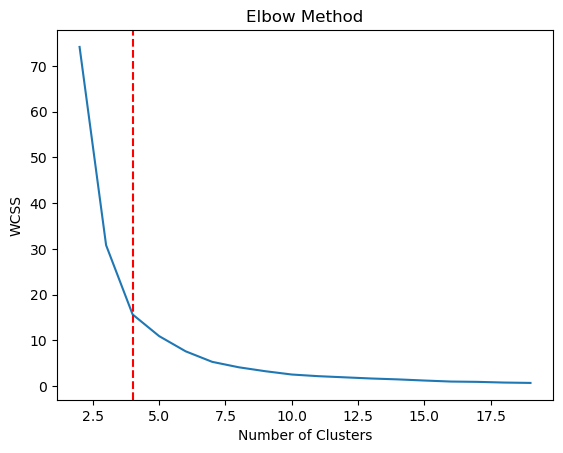

In [14]:
#unsupervised learning using unscalled data
#KMeans clustering
#finding the optimum number of cluster by elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,20),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.axvline(x=4,linestyle="dashed",color='Red')
plt.show()

In [15]:
pca_data1.corr().round(1)

,pc1,pc2,pc3
pc1,1.0,0.0,0.0
pc2,0.0,1.0,0.0
pc3,0.0,0.0,1.0


In [16]:
#cluster labels
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(pca_data1)
cluster_labels=kmeans.predict(pca_data1)
cluster_labels

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 2, 3,

In [17]:
pd.Series(cluster_labels).value_counts()

0    211
1    105
2     87
3     37
dtype: int64

In [18]:
pca_data1

,pc1,pc2,pc3
0,0.686162,-0.143443,-0.106267
1,0.692978,-0.141117,-0.101794
2,0.690638,-0.142219,-0.092140
3,-0.304239,-0.270145,-0.001856
4,0.671296,-0.148007,-0.081052
...,...,...,...
435,-0.281904,-0.269205,0.220292
436,-0.318431,-0.277468,0.071273
437,0.775946,-0.125801,0.196397
438,-0.303409,-0.269974,-0.040432


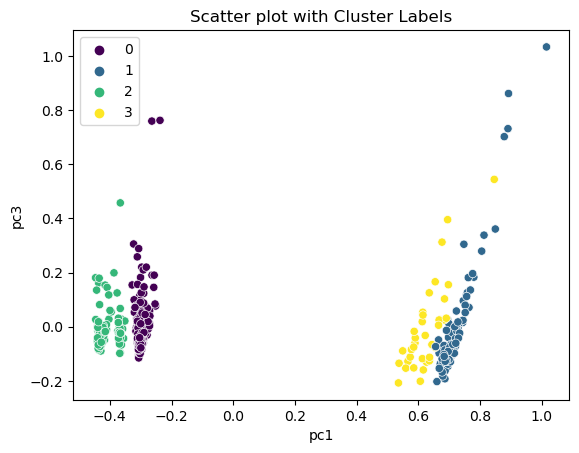

In [19]:
#scatter plotting data with the colored as cluster_labels
sns.scatterplot(x='pc1',y='pc3',hue=cluster_labels,data=pca_data1,palette='viridis')
plt.title('Scatter plot with Cluster Labels')
plt.show()

In [20]:
#agglometric Clustering

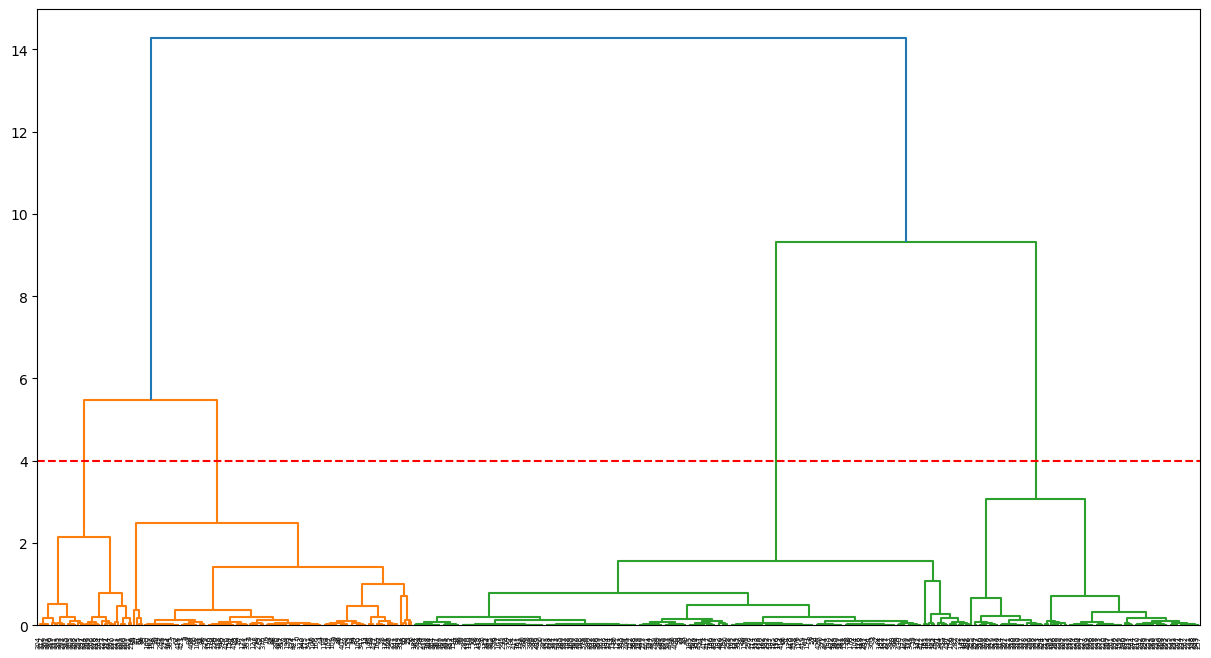

In [21]:
#Dendrogram for finding the optimum number of cluster for Aggolmorative Clustering
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(pca_data1,method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(4,0,5000,color='r',linestyles='dashed')
plt.show()

In [22]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(pca_data1)
labels

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 3, 0, 3,

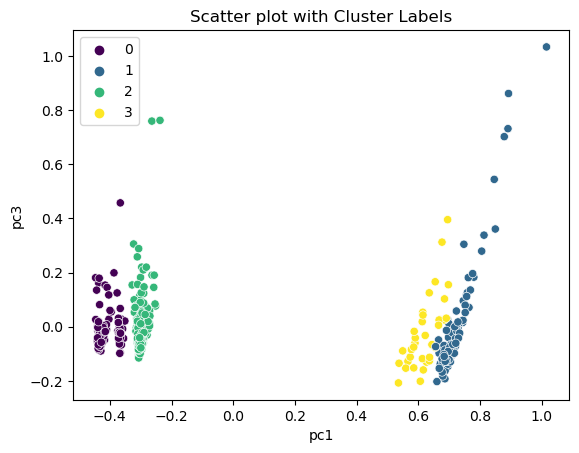

In [23]:
#scatter plotting with hue as labes of the cluster
sns.scatterplot(x='pc1',y='pc3',hue=labels,data=pca_data1,palette='viridis')
plt.title('Scatter plot with Cluster Labels')
plt.show()

In [24]:
#here we have implemented both kmeans clustering and aggolomerative clustering after the pca and scaling of the data, we have also ploted the same using scatter plot

In [25]:
#the optimum number of cluster is 4